# Final Project IA241 - Andrew Britland

## Data Source

In [5]:
%matplotlib inline
import pandas

## Quick view of Data

In [6]:
df = pandas.read_excel('s3://britland-ia-241-spring-2021/covid_data.xls')
df [:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## Proportion of people infected in each continent

In [7]:
pandas.unique(df['continentExp'])

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

### Number of cases in each continent

<AxesSubplot:xlabel='continentExp'>

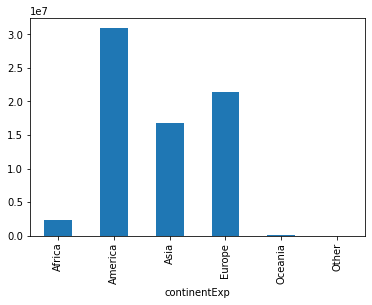

In [48]:
continental_cases = df.groupby('continentExp').sum()['cases']
continental_cases.plot.bar()

### Population of each continent

In [111]:
Asia_data = df.loc[ df['continentExp']=='Asia']
Africa_data = df.loc[ df['continentExp']=='Africa']
America_data = df.loc[ df['continentExp']=='America']
Europe_data = df.loc[ df['continentExp']=='Europe']
Oceania_data = df.loc[ df['continentExp']=='Oceania']
Other_data = df.loc[ df['continentExp']=='Other']

pandas.unique(Asia_data['countriesAndTerritories'])
Asia_pop = Asia_data.groupby('countriesAndTerritories').mean()['popData2019']
Asia_cases = Asia_data.sum()['cases']
Sum_Asia_Pop = sum(Asia_pop)
print('The population of Asia is', sum(Asia_pop))
#print(Sum_Asia_Pop)
#print(Asia_cases)

pandas.unique(Africa_data['countriesAndTerritories'])
Africa_pop = Africa_data.groupby('countriesAndTerritories').mean()['popData2019']
Africa_cases = Africa_data.sum()['cases']
Sum_Africa_Pop = sum(Africa_pop)
print('The population of Africa is', sum(Africa_pop))
#print(sum(Africa_pop))
#print(Africa_cases)

pandas.unique(America_data['countriesAndTerritories'])
America_pop = America_data.groupby('countriesAndTerritories').mean()['popData2019']
America_cases = America_data.sum()['cases']
Sum_America_Pop = sum(America_pop)
print('The population of America is', sum(America_pop))
#print(sum(America_pop))
#print(America_cases)

pandas.unique(Europe_data['countriesAndTerritories'])
Europe_pop = Europe_data.groupby('countriesAndTerritories').mean()['popData2019']
Europe_cases = Europe_data.sum()['cases']
Sum_Europe_Pop = sum(Europe_pop)
print('The population of Europe is', sum(Europe_pop))
#print(sum(Europe_pop))
#print(Europe_cases)

pandas.unique(Other_data['countriesAndTerritories'])
Oceania_pop = Oceania_data.groupby('countriesAndTerritories').mean()['popData2019']
Oceania_cases = Oceania_data.sum()['cases']
Sum_Oceania_Pop = sum(Oceania_pop)
print('The population of Oceania is', sum(Oceania_pop))
#print(Oceania_cases)



The population of Asia is 4460056021.0
The population of Africa is 1306903030.0
The population of America is 1013601796.0
The population of Europe is 848216220.0
The population of Oceania is nan


### Comparison of proportion of continents infected

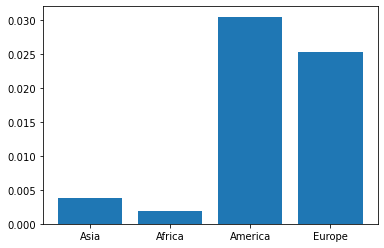

In [107]:
Asia_trend = Asia_cases/Sum_Asia_Pop
Africa_trend = Africa_cases/Sum_Africa_Pop
America_trend = America_cases/Sum_America_Pop
Europe_trend = Europe_cases/Sum_Europe_Pop
Oceania_trend = Oceania_cases/Sum_Oceania_Pop
Country_Trends = Asia_trend,Africa_trend,America_trend,Europe_trend,Oceania_trend
#print(Country_Trends)
import matplotlib.pyplot as plt
Country_List = [('Asia', Asia_trend),('Africa',Africa_trend),('America',America_trend),('Europe',Europe_trend),('Oceania',Oceania_trend)]
from math import log
Country_List2 = [(elem1, elem2) for elem1, elem2 in Country_List]
zip(*Country_List2)
plt.bar(*zip(*Country_List2))
plt.show()

## Highest and lowest cases divided by population

In [31]:
sum_cases_per_country=df.groupby('countriesAndTerritories').sum()['cases']

In [34]:
pop_per_country=df.groupby('countriesAndTerritories').mean()['popData2019']

In [35]:
prop_per_country=sum_cases_per_country/pop_per_country

### Top 10 countries with highest percent of population infected over time

<AxesSubplot:xlabel='countriesAndTerritories'>

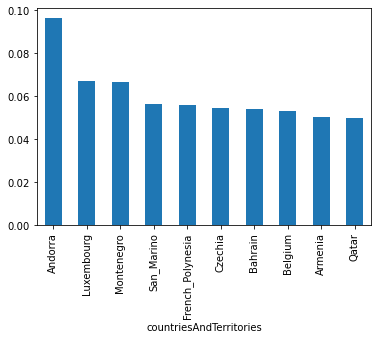

In [36]:
prop_per_country.nlargest(10).plot.bar()

### Top 10 countries with lowest percent of population infected over time

<AxesSubplot:xlabel='countriesAndTerritories'>

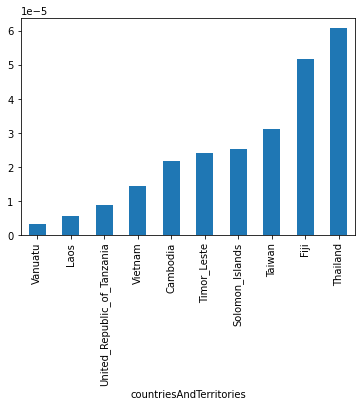

In [38]:
prop_per_country.nsmallest(10).plot.bar()

## Months with highest and lowest global cases

In [39]:
sum_monthly_cases=df.groupby('month').sum()['cases']

<AxesSubplot:xlabel='month'>

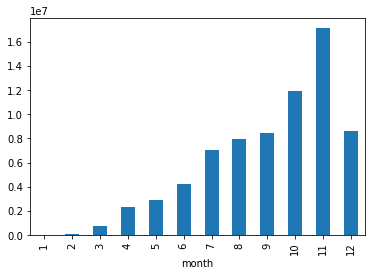

In [40]:
sum_monthly_cases.plot.bar()